In [13]:
from src import analysis_modules
import MDAnalysis as mda
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 25})

In [2]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.gri

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
colours = {"DOPC": "blue",
           "POPC": "purple",
           "POPE": "orange"}

In [5]:
out_dir = "figures/Plots/"

# DOPC & POPC

In [6]:
results = "data/"

DOPC_POPC_10 = results + "DOPC_POPC_10.csv"

DOPC_POPC_20 = results + "DOPC_POPC_20.csv"

DOPC_POPC_30 = results + "DOPC_POPC_30.csv"

POPC_POPE_10 = results + "POPC_POPE_10.csv"

POPC_POPE_20 = results + "POPC_POPE_20.csv"

POPC_POPE_30 = results + "POPC_POPE_30.csv"

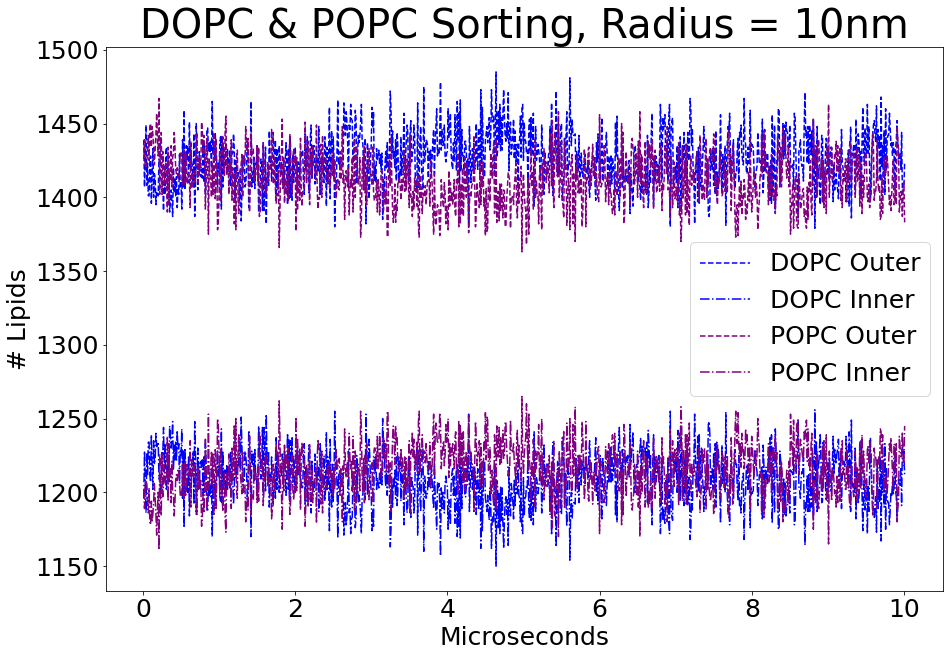

In [14]:
analysis_modules.csv_to_plot(DOPC_POPC_10, ["DOPC", "POPC"], rolling=1, \
                    title="DOPC & POPC Sorting, Radius = 10nm", colours=colours, index_scaling=100, \
                    x_label = "Microseconds", out=out_dir + "DOPC_POPC_r10.png")

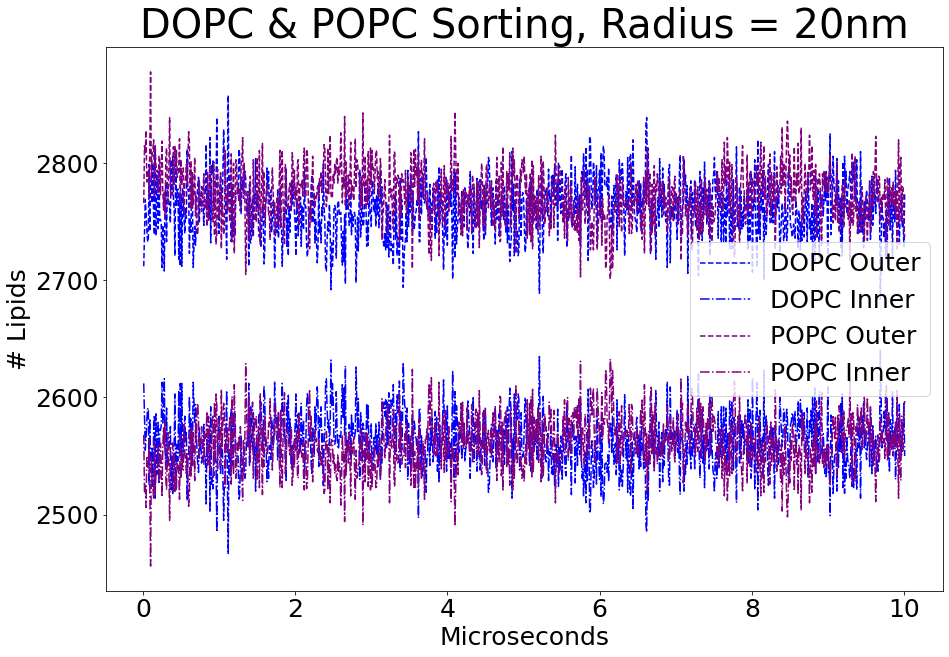

In [15]:
analysis_modules.csv_to_plot(DOPC_POPC_20, ["DOPC", "POPC"], rolling=1, title="DOPC & POPC Sorting, Radius = 20nm", colours=colours, index_scaling=100, x_label = "Microseconds", out=out_dir + "DOPC_POPC_r20.png")

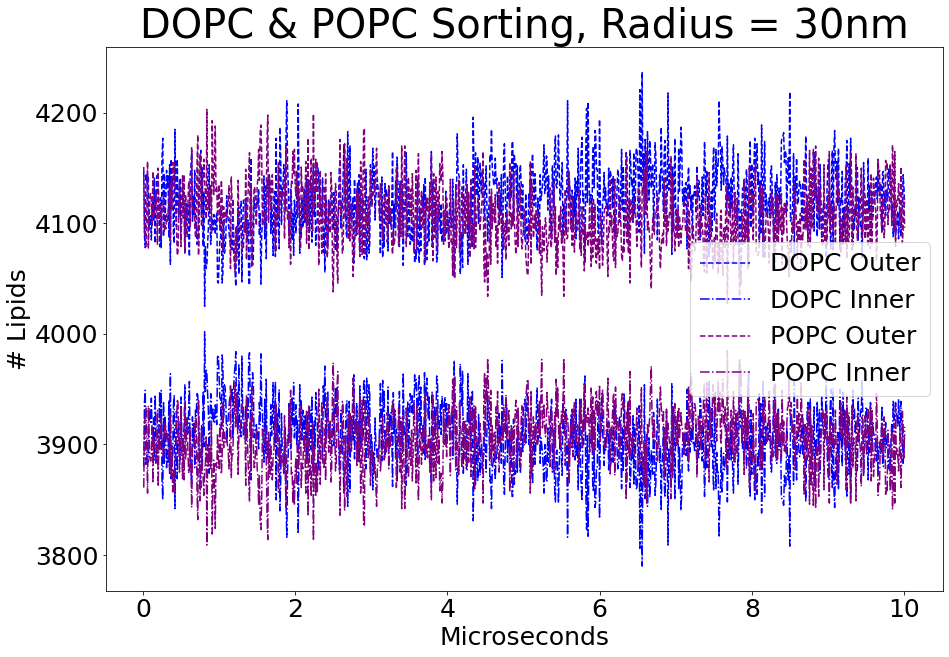

In [16]:
analysis_modules.csv_to_plot(DOPC_POPC_30, ["DOPC", "POPC"], title="DOPC & POPC Sorting, Radius = 30nm", colours=colours, index_scaling=100, x_label = "Microseconds", out=out_dir + "DOPC_POPC_r30.png")

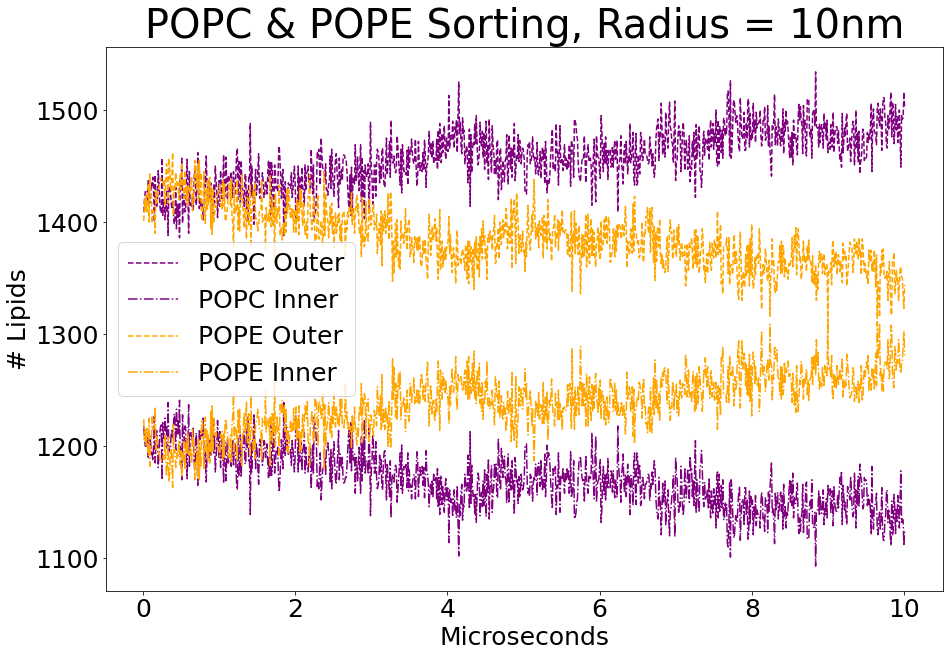

In [17]:
analysis_modules.csv_to_plot(POPC_POPE_10, ["POPC", "POPE"], title="POPC & POPE Sorting, Radius = 10nm", rolling=1, colours=colours, index_scaling=100, x_label = "Microseconds", out=out_dir + "POPC_POPE_r10.png")

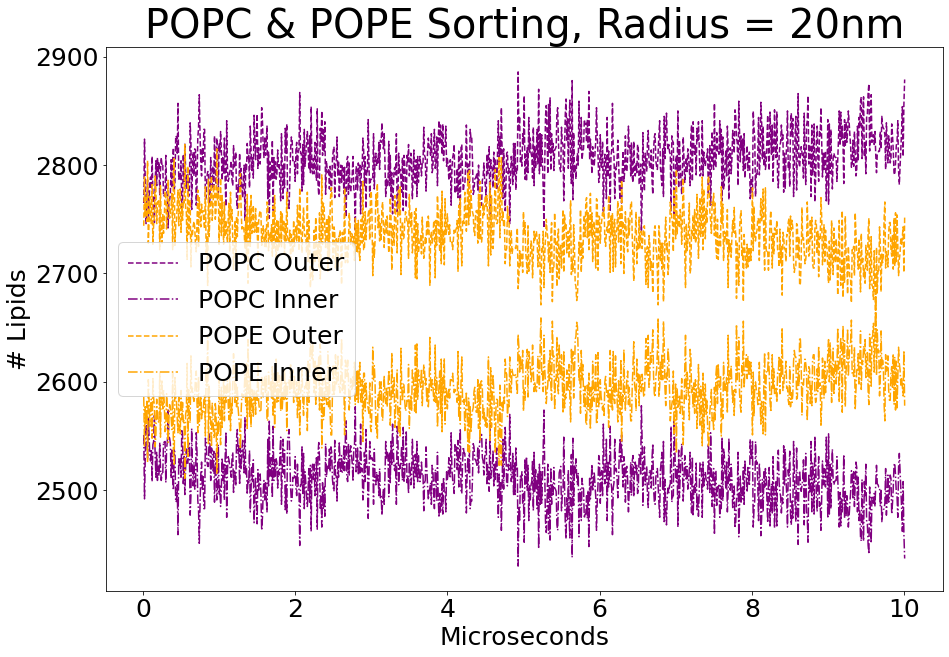

In [18]:
analysis_modules.csv_to_plot(POPC_POPE_20, ["POPC", "POPE"], title="POPC & POPE Sorting, Radius = 20nm", rolling=1, colours=colours, index_scaling=100, x_label = "Microseconds", out=out_dir + "POPC_POPE_r20.png")

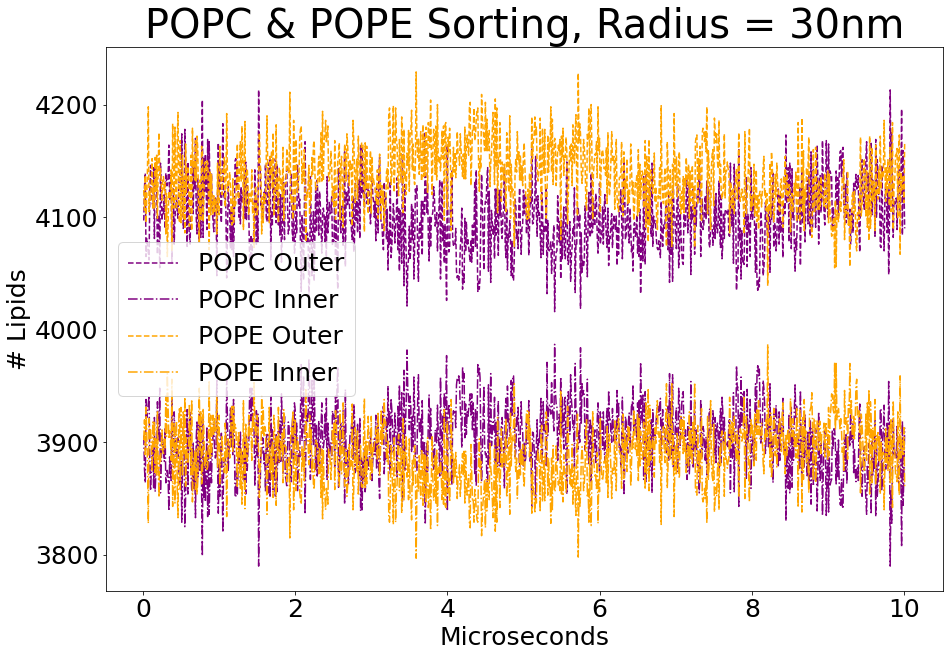

In [19]:
analysis_modules.csv_to_plot(POPC_POPE_30, ["POPC", "POPE"], title="POPC & POPE Sorting, Radius = 30nm", rolling=1, colours=colours, index_scaling=100, x_label = "Microseconds", out=out_dir + "POPC_POPE_r30.png")